## HW-4 • Math 189 • Sp 2024
### Due Date: Wed, May 29

> NAME: $\color{red}{\text{    Chang Shu     }}$
> 
> PID: $\color{red}{\text{    A16846972     }}$
>
> 

---

## Instructions
* Submit your solutions online on Gradescope
* Look at the detailed instructions [here](https://canvas.ucsd.edu/courses/55191/pages/expectations)


I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

# Question 1

> ##### Linear regression

The `data` folder  on Github [here](https://github.com/ucsd-math189/sp24) or on Canvas (`Files > data`) contains the `housing.csv` dataset which contains housing prices in California from the 1990 California census. The objective is to predict the median house price for California districts based on various features. The features are the following:

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building
4. `total_rooms`: Total number of rooms within a block
5. `total_bedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `median_income`: Median income for households within a block of houses
9. `median_house_value`: Median house value for households within a block
10. `ocean_proximity`: Location of the house w.r.t ocean/sea


> a. Load the dataset and display the first 5 rows of the dataset.

In [79]:
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
path = 'data/housing.csv'
df = pd.read_csv(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


> b. Describe the data type (e.g., categorical, discrete quantitative, etc.) of each variable in the dataset. If you identify any categorical variables, explicitly convert them to categorical variables in your pandas dataframe.

In [80]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

longitudue: continuous quantitative\
latitude: continuous quantitative\
housing_median_age: discrete quantitative\
total_rooms: discrete quantitative\
total_bedrooms: discrete quantitative\
population: discrete quantitative\
households: discrete quantitative\
median_income: continuous quantitative\
median_house_value: continuous quantitative\
ocean_proximity: categorical

In [81]:
#If you identify any categorical variables, explicitly convert them to categorical variables in your pandas dataframe.
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

> c. Fit a linear regression model to predict the `median_house_value` based on all other covariates. 

In [82]:
response = 'median_house_value'
covariates = df.columns.drop(response)
model_formula = f'{response} ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms	+ population + households	+ median_income	+ ocean_proximity'
model_formula
full_model = smf.ols(model_formula, data=df).fit()
# print full_model summary
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        23:45:53   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

> d. Based on the summary of the linear regression model, do you think this is a good fit for the data? Explain your answer.

It is not a good fit for the data. While the model shows a reasonably good fit with an R-squared of 0.646 and statistically significant coefficients, the very high condition number suggests potential multicollinearity issues. It could affect the reliability of the coefficient estimates.

> e. Comment on the model assumptions and to what extent they are satisfied or not satisfied.

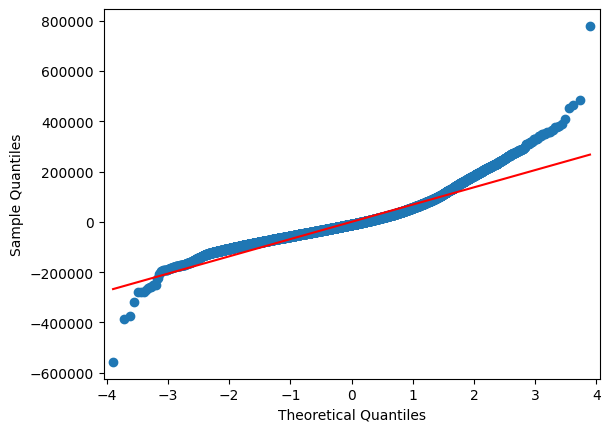

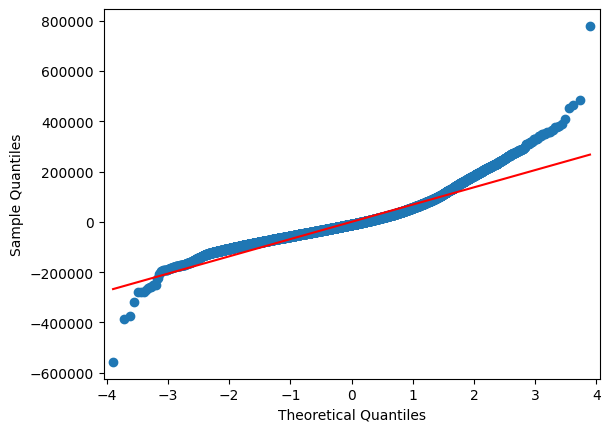

In [83]:
sm.qqplot(full_model.resid, line ='s')

<BarContainer object of 21 artists>

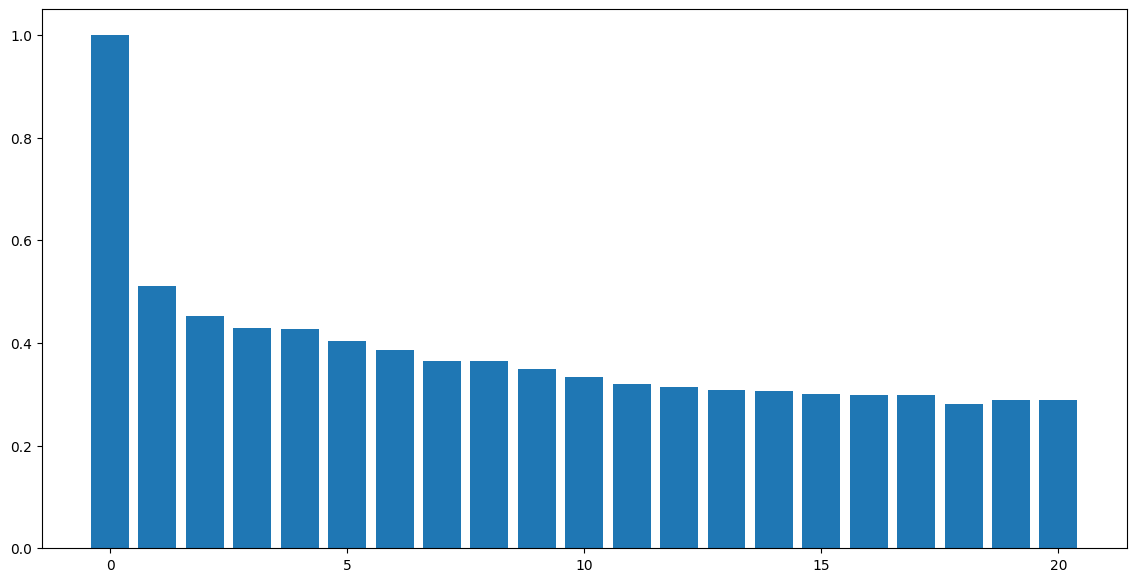

In [84]:
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
lags = 20
fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(range(lags+1), acf(full_model.resid, nlags=lags))

(-5.0, 5.0)

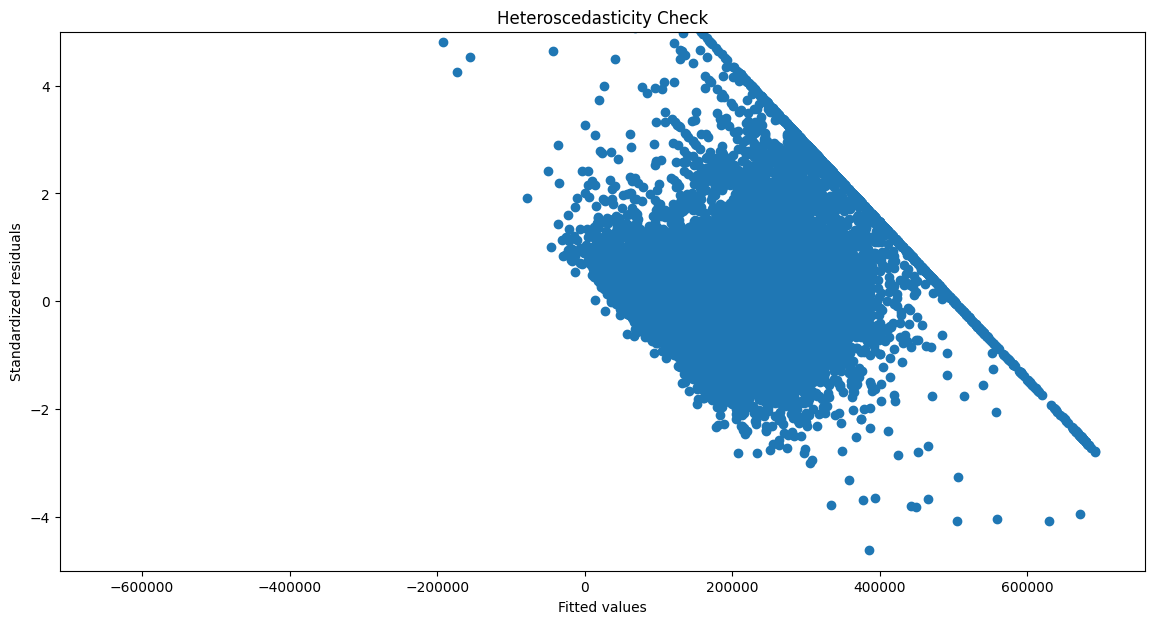

In [85]:
fig, ax = plt.subplots(figsize=(14, 7))
def standardize(X):
    return (X - X.mean()) / X.std()
ax.scatter(full_model.fittedvalues, standardize(full_model.resid))
ax.set_xlabel('Fitted values')
ax.set_ylabel('Standardized residuals')
ax.set_title('Heteroscedasticity Check')
ax.set_ylim(-5, 5)

Independence: Likely violated based on the ACF plot showing significant autocorrelations at several lags.\
Identical/homoscedasticity: Likely violated based on the scatter plot showing increasing variance with fitted values.\
Normally distributed: Likely violated based on the Q-Q plot showing deviations from the line.\
Linearity: Likely satisfied based on the scatter plot of residuals.

> f. Compute the variance inflation factor (VIF) for each covariate. What do you observe?

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

exog = full_model.model.exog
names = full_model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: ocean_proximity[T.INLAND]:  2.860
VIF: ocean_proximity[T.ISLAND]:  1.002
VIF: ocean_proximity[T.NEAR BAY]:  1.567
VIF: ocean_proximity[T.NEAR OCEAN]:  1.197
VIF: longitude:  18.091
VIF: latitude:  19.969
VIF: housing_median_age:  1.324
VIF: total_rooms:  12.966
VIF: total_bedrooms:  36.310
VIF: population:  6.446
VIF: households:  35.173
VIF: median_income:  1.786


There are some features with high VIF values(>10). Thus, VIF values show significant multicollinearity issues with variables such as longitude, latitude, total_bedrooms, households, and total_rooms.

> g. Drop the covariate(s) with a variance inflation factor greater than 5 and fit the linear regression model again.

In [87]:
response = 'median_house_value'
other_vars = df.columns.drop(['median_house_value', 'longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households'])
other_vars = '+'.join(other_vars)
new_model_formula = f'{response} ~ {other_vars}'
new_model = smf.ols(new_model_formula, data=df).fit()
# print new_model summary
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     5092.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        23:45:54   Log-Likelihood:            -2.6049e+05
No. Observations:               20640   AIC:                         5.210e+05
Df Residuals:                   20633   BIC:                         5.211e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

> h. Based on the summary of the regression model `new_model` interpret the coefficients of the covariates.

Intercept: The intercept is 55151.04, which represents the baseline value of the median house value when all the predictors are zero. \
ocean_proximity[T.INLAND]: The coefficient is -71654.04, indicating that houses located inland have a median value that is 71654.04 units lower than the baseline category ('ocean_proximity').\
ocean_proximity[T.ISLAND]: The coefficient is 184946.83, indicating that houses located on an island have a median value that is 184946.83 units higher than the baseline category. \
ocean_proximity[T.NEAR BAY]: The coefficient is 13540.42, indicating that houses located near a bay have a median value that is 13540.42 units higher than the baseline category.\
ocean_proximity[T.NEAR OCEAN]: The coefficient is 17867.04, indicating that houses located near the ocean have a median value that is 17867.04 units higher than the baseline category.\
housing_median_age: The coefficient is 926.82, indicating that for each additional year in the median age of the housing units in the area, the median house value increases by 926.82 units. \
median_income: The coefficient is 38167.14, indicating that for each additional unit increase in median income, the median house value increases by 38167.14 units.

> i. Holding all other covariates constant, which of the `ocean_proximity` categories do you expect to find a house with the highest median house value? Why?

Among these categories, ocean_proximity[T.ISLAND] has the highest positive coefficient (184946.83). This means that, holding all other covariates constant, houses located on an island are expected to have the highest median house value.

---

# Question 2

For this question, we are going to use the `abortion` dataset which consists of Abortion Opinions in the General Social Survey (GSS) from 1977 to 2018. The article related to the dataset can be found [here](https://gss.norc.org/Documents/reports/methodological-reports/MR133%20Abortion.pdf).

The data has been preprocessed and is available in the `data` folder as `abortion.csv`. The dataset contains the following columns:

1. `abortion`: Do you think that abortion should be legal for any reason?
2. `year`: Year of the survey
3. `age`: Respondent's age
4. `sex`: Respondent's sex
5. `race`: Respondent's race
6. `education`: How many years of education has the respondent completed
7. `relactiv`: Self-reported religiosity
8. `pid`: Respondent's political party identification (0: strong democrat ... 6: strong republican)


<br><br><br><br>

> a. Load the dataset and display the first 5 rows of the dataset.

In [88]:
path = 'data/abortion.csv'
df = pd.read_csv(path)
df.head()

,year,age,race,sex,educ,relactiv,pid,abortion
0,2006,50.0,Black,Female,13.0,4.0,0.0,1.0
1,2006,50.0,Black,Female,12.0,1.0,0.0,1.0
2,2006,20.0,Black,Male,14.0,1.0,0.0,1.0
3,2006,29.0,Black,Female,12.0,1.0,3.0,1.0
4,2006,23.0,Black,Female,16.0,1.0,0.0,1.0


> b. Summarize the data type (e.g., categorical, discrete quantitative, etc.) of each variable in the dataset. If you identify any categorical variables, explicitly convert them to categorical variables in your pandas dataframe.

In [89]:
df.columns

Index(['year', 'age', 'race', 'sex', 'educ', 'relactiv', 'pid', 'abortion'], dtype='object')

year: discrete quantitative\
age: discrete quantitative\
race: categorical\
sex: categorical\
educ: discrete quantitative\
relativ: ordinal\
pid: ordinal\
abortion: categorical

In [90]:
df['relactiv'] = df['relactiv'].astype('category')
df['pid'] = df['pid'].astype('category')

> c. Fit a logistic regression model to predict the `abortion` based on all other covariates.

In [91]:
from IPython.display import display, HTML
model1 = smf.logit('abortion ~ year	+ age	+ race + sex + educ + relactiv + pid', data=df).fit()
# print model1 summary
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.282465
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               abortion   No. Observations:                10133
Model:                          Logit   Df Residuals:                    10111
Method:                           MLE   Df Model:                           21
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.1292
Time:                        23:45:55   Log-Likelihood:                -2862.2
converged:                       True   LL-Null:                       -3286.8
Covariance Type:            nonrobust   LLR p-value:                3.339e-166
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.8744     16.861      0.289      0.773     -28.173      37.921
race[T.Othe

> d. Identify the covariates which are statistically significant at a 15% significance level.

race[T.Other], sex[T.Male], relactiv[T.3.0], relactiv[T.4.0], relactiv[T.5.0], relactiv[T.6.0], relactiv[T.7.0], relactiv[T.8.0], relactiv[T.9.0], relactiv[T.10.0], pid[T.3.0], pid[T.4.0], pid[T.5.0], pid[T.6.0], age, educ

> e. Based on the variables you identified in part d, fit a new logistic regression model only including those covariates.

In [92]:
model2 = smf.logit('abortion ~ age + race + sex + educ + relactiv + pid', data=df).fit()
# print model2 summary
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.282467
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               abortion   No. Observations:                10133
Model:                          Logit   Df Residuals:                    10112
Method:                           MLE   Df Model:                           20
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.1292
Time:                        23:45:56   Log-Likelihood:                -2862.2
converged:                       True   LL-Null:                       -3286.8
Covariance Type:            nonrobust   LLR p-value:                5.152e-167
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5504      0.233      6.667      0.000       1.095       2.006
race[T.Othe

> f. Include an interaction term between `sex` and `pid` in your logistic regression model.

In [93]:
model3 = smf.logit('abortion ~ age + race + sex + educ + relactiv + pid + sex:pid', data=df).fit()
# print model3 summary
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.282155
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               abortion   No. Observations:                10133
Model:                          Logit   Df Residuals:                    10106
Method:                           MLE   Df Model:                           26
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.1301
Time:                        23:45:56   Log-Likelihood:                -2859.1
converged:                       True   LL-Null:                       -3286.8
Covariance Type:            nonrobust   LLR p-value:                1.392e-163
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.5673      0.245      6.409      0.000       1.088      

> g. Is there sufficient evidence to conclude that the `sex` moderates the effect of `pid` on abortion opinion? Explain your answer.

There is not sufficient evidence to conclude that sex moderates the effect of pid on abortion opinion, as all the p-values associated with the interaction terms between sex and pid are greater than 0.05. This suggests that the interaction between sex and pid does not have a significant impact on abortion opinion in this model.

> h. Interpret each coefficient associated with the covariates in the new logistic regression model, `model3`.

Intercept (1.5673): The log-odds of the outcome (abortion opinion) when all predictor variables are zero.\
race[T.Other] (-0.2126): The log-odds of the outcome for individuals of "Other" race compared to the reference category (the baseline race category). A negative coefficient suggests 0.2126 lower log-odds of the outcome for this group.\
race[T.White] (0.0462): The log-odds of the outcome for individuals of "White" race compared to the reference category. A positive coefficient suggests 0.0462 higher log-odds of the outcome for this group.\
sex[T.Male] (0.1712): The log-odds of the outcome for males compared to females (reference category). A positive coefficient suggests 0.1712 higher log-odds of the outcome for males.\
relactiv[T.2.0] (0.2183): The log-odds of the outcome for individuals with religious activity level 2.0 compared to the baseline religious activity level. A positive coefficient indicates 0.2183 higher log-odds of the outcome for this group.\
relactiv[T.3.0] (-0.4314): The log-odds of the outcome for individuals with religious activity level 3.0 compared to the baseline. A negative coefficient indicates 0.4314 lower log-odds of the outcome for this group.\
relactiv[T.4.0] (-1.1483): The log-odds of the outcome for individuals with religious activity level 4.0 compared to the baseline. A negative coefficient indicates 1.1483 lower log-odds of the outcome.\
relactiv[T.5.0] (-0.9499): The log-odds of the outcome for individuals with religious activity level 5.0 compared to the baseline. A negative coefficient indicates 0.9499 lower log-odds of the outcome.\
relactiv[T.6.0] (-1.5210): The log-odds of the outcome for individuals with religious activity level 6.0 compared to the baseline. A negative coefficient indicates 1.5210 lower log-odds of the outcome.\
relactiv[T.7.0] (-1.8802): The log-odds of the outcome for individuals with religious activity level 7.0 compared to the baseline. A negative coefficient indicates 1.8802 lower log-odds of the outcome.\
relactiv[T.8.0] (-1.7597): The log-odds of the outcome for individuals with religious activity level 8.0 compared to the baseline. A negative coefficient indicates 1.7597 lower log-odds of the outcome.\
relactiv[T.9.0] (-2.0260): The log-odds of the outcome for individuals with religious activity level 9.0 compared to the baseline. A negative coefficient indicates 2.0260 lower log-odds of the outcome.\
relactiv[T.10.0] (-1.4738): The log-odds of the outcome for individuals with religious activity level 10.0 compared to the baseline. A negative coefficient indicates 1.4738 lower log-odds of the outcome.\
pid[T.1.0] (-0.1415): The log-odds of the outcome for individuals with party identification 1.0 compared to the baseline. A negative coefficient indicates 0.1415 lower log-odds of the outcome.\
pid[T.2.0] (0.0627): The log-odds of the outcome for individuals with party identification 2.0 compared to the baseline. A positive coefficient indicates 0.0627 higher log-odds of the outcome.\
pid[T.3.0] (-0.7830): The log-odds of the outcome for individuals with party identification 3.0 compared to the baseline. A negative coefficient indicates 0.7830 lower log-odds of the outcome.\
pid[T.4.0] (-1.2527): The log-odds of the outcome for individuals with party identification 4.0 compared to the baseline. A negative coefficient indicates 1.2527 lower log-odds of the outcome.\
pid[T.5.0] (-1.0158): The log-odds of the outcome for individuals with party identification 5.0 compared to the baseline. A negative coefficient indicates 1.0158 lower log-odds of the outcome.\
pid[T.6.0] (-1.6691): The log-odds of the outcome for individuals with party identification 6.0 compared to the baseline. A negative coefficient indicates 1.6691 lower log-odds of the outcome.\
sex[T.Male]T.1.0(-0.1621): The interaction effect of being male and having party identification 1.0 on the log-odds of the outcome. A negative coefficient indicates 0.1621 lower log-odds of the outcome.\
sex[T.Male]T.2.0(-0.0295): The interaction effect of being male and having party identification 2.0 on the log-odds of the outcome. A negative coefficient indicates 0.0295 lower log-odds of the outcome.\
sex[T.Male]T.3.0(-0.1783): The interaction effect of being male and having party identification 3.0 on the log-odds of the outcome. A negative coefficient indicates 0.1783 lower log-odds of the outcome.\
sex[T.Male]T.4.0(0.2695): The interaction effect of being male and having party identification 4.0 on the log-odds of the outcome. A positive coefficient indicates 0.2695 higher log-odds of the outcome.\
sex[T.Male]T.5.0(0.0967): The interaction effect of being male and having party identification 5.0 on the log-odds of the outcome. A positive coefficient indicates 0.0967 higher log-odds of the outcome.\
sex[T.Male]T.6.0(0.2639): The interaction effect of being male and having party identification 6.0 on the log-odds of the outcome. A positive coefficient indicates 0.2639 higher log-odds of the outcome.

> i. Print the confusion matrix and report the classification accuracy of `model3`.

In [94]:
c_matrix = model3.pred_table(threshold=0.5)
c_matrix

array([[  24.,  986.],
       [  30., 9093.]])

In [95]:
true_pos = c_matrix[1, 1] / c_matrix[1].sum()
true_neg = c_matrix[0, 0] / c_matrix[0].sum()
false_pos = c_matrix[0, 1] / c_matrix[0].sum()
false_neg = c_matrix[1, 0] / c_matrix[1].sum()
print(f' True Positive rate: {true_pos: .3f}\n True Negative rate: {true_neg: .3f}\n False Positive rate: {false_pos: .3f}\n False Negative rate: {false_neg: .3f}')

 True Positive rate:  0.997
 True Negative rate:  0.024
 False Positive rate:  0.976
 False Negative rate:  0.003


In [96]:
accuracy = (c_matrix[0, 0] + c_matrix[1, 1]) / c_matrix.sum() 
accuracy

0.8997335438665746

> j. Plot the ROC curve and compute the AUC of `model3`.

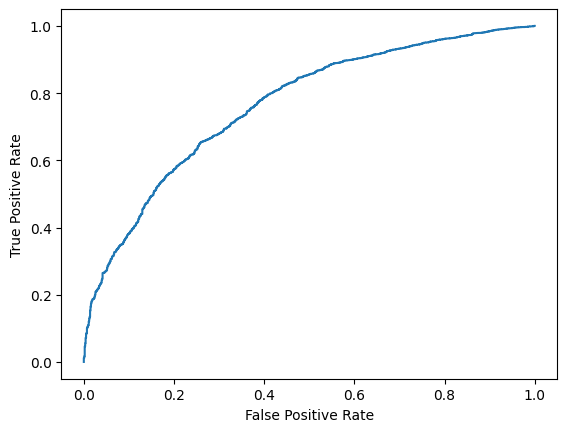

In [97]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(df['abortion'], model3.predict(df))
indx = (0.1 - 5e-3 <= thresholds) * (thresholds <= 0.1 + 5e-3)
tpr[indx], fpr[indx],  thresholds[indx]
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [98]:
metrics.roc_auc_score(df['abortion'], model3.predict(df))

0.7642534427727546